# 数据结构优缺点

#特点：堆上的每个节点有一个或者两个子节点；优先队列的每个结点的只都要比两个子节点的值大（大顶堆/高优先级队列）或者小（小顶堆/低优先级队列）

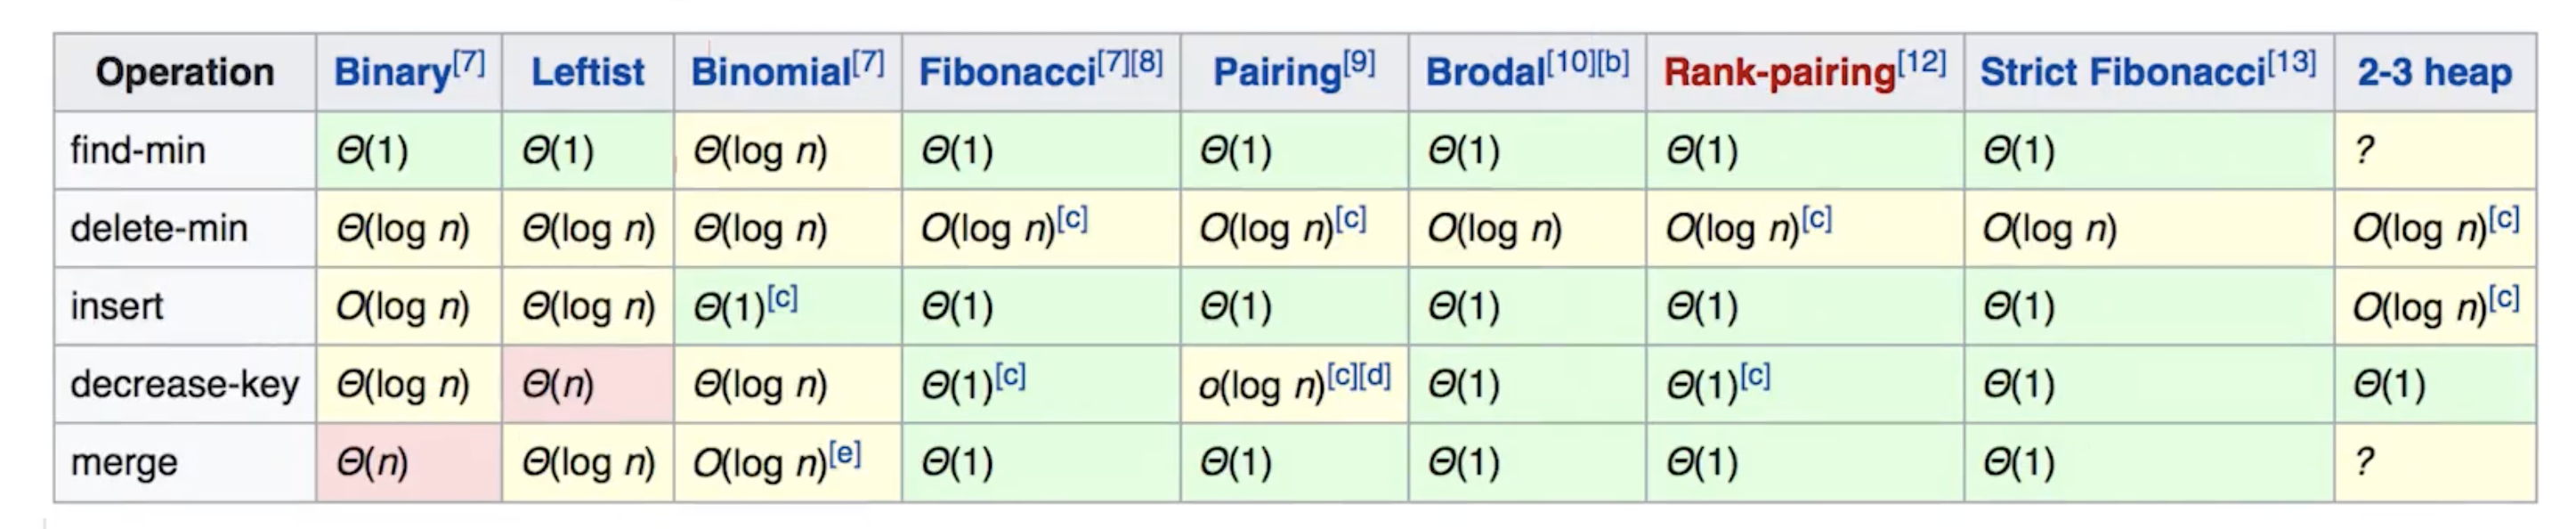

#1、可以看到用二叉堆实现性能并不好，所以很多语言内部实验的方式通常是选用更优的斐波那契堆或者严格斐波那契堆、AVL树、红黑树等实现；

# 和其他数据结构的关系

#1、堆是树的一种特殊情况，即每个结点最多只能有两个子节点的树；
#2、优先队列并不是队列，它的实现可以有多种方式，通常最常用的实现方式是借助堆这种数据结构来实现；

# 常用于解决什么样的问题

#1、优先队列常用于topK或者K个中找最优问题；

# 常用的实现方式

In [2]:
import heapq
# heapq 是一个二叉堆的实现，其内部使用内置的 list 对象，对于列表中的每一个元素，
# 其满足 a[k] <= a[2*k+1] and a[k] <= a[2*k+2] ，
# 因此，该方法默认的是一个最小堆，a[0] 为队列中的最小元素。

In [10]:
# 使用heapq 实现最小优先队列
def smallet_queue(arr):
    """
    默认为最小优先队列
    """
    print("原始数组：{0}".format(arr))
    # 将给定的列表转化为最小堆，线性时间O(n) 
    heapq.heapify(arr)
    print("转换为小顶堆后：",arr)
    
    
    # 插入元素
    heapq.heappush(arr,2)
    print("插入新元素后：%s"%(arr))
    
    # 弹出最小元素
    min_num = heapq.heappop(arr)
    print("弹出的最小元素：%s"%(min_num))
    print("弹出最小元素后：%s"%(arr))
    
    # 返回最小元素
    print("输出最小元素：%s"%(arr[0]))
    
    # 弹出最小元素，并插入一个新的元素，相当于先heappop，在heappush
    min_num2 = heapq.heapreplace(arr,0)
    print("第二次弹出的最小元素：%s"%(min_num2))
    print("现在的堆结构为: %s"%(arr))

smallet_queue([5,6,7,4,3])

原始数组：[5, 6, 7, 4, 3]
转换为小顶堆后： [3, 4, 7, 5, 6]
插入新元素后：[2, 4, 3, 5, 6, 7]
弹出的最小元素：2
弹出最小元素后：[3, 4, 7, 5, 6]
输出最小元素：3
第二次弹出的最小元素：3
现在的堆结构为: [0, 4, 7, 5, 6]


In [18]:
# 使用heapq 实现最大优先队列
def largest_queue(arr):
    """
    最大优先队列的实现

    阅读 heapq 模块的源代码可以发现，其内置了最大优先队列的实现函数和操作函数，但没有内置新插入元素的函数
    """
    
    print("原数组：%s"%(arr))
    heapq._heapify_max(arr)
    print("转换为大顶堆后：%s"%(arr))
    
    max_num = heapq._heappop_max(arr)
    print("取出的最大值为：%s"%(max_num))
    print("取出最大值后的大顶堆：%s"%(arr))
    
    print("输出当前最大值：%s"%(arr[0]))
    
    max_num = heapq._heapreplace_max(arr,2)
    print("第二次取出的最大值为：%s"%(max_num))
    print("取出并插入新元素后的大顶堆：%s"%(arr))
    
largest_queue([5,6,7,4,3])

原数组：[5, 6, 7, 4, 3]
转换为大顶堆后：[7, 6, 5, 4, 3]
取出的最大值为：7
取出最大值后的大顶堆：[6, 4, 5, 3]
输出当前最大值：6
第二次取出的最大值为：6
取出并插入新元素后的大顶堆：[5, 4, 2, 3]


In [27]:
# 复杂结构的优先队列
# 在现实场景中，我们在使用优先队列时往往不是针对简单的数组进行优先排列，而是对元组、列表或者字典等一个个复杂的对象进行优先排列。
# 下面以元组为例，其在构建优先队列时，默认是以第一个元素来进行排列，当第一个元素相同时，则开始比较第二个。
# 字符串的比较从首字母开始进行比较。

def object_queue():
    """
    针对对象结构的优先队列
    """
    q = []
    heapq.heappush(q, (2, 'code'))
    heapq.heappush(q, (1, 'eat'))
    heapq.heappush(q, (3, 'sleep'))
    heapq.heappush(q, (2, 'play'))
    heapq.heappush(q, (3, "debug"))
    print("初始优先队列：{0}".format(q))
    heapq._heapify_max(q)
    print("转换为大顶堆：%s"%(q))
    while q:
        item = heapq._heappop_max(q)
        print("当前最大的item:{0}".format(item))
        
    
    q1 = [(1, 'eat'), (2, 'code'), (3, 'sleep'), (2, 'play'), (3, 'debug')]
    k_smallest = heapq.nsmallest(3,q1,key=lambda x:x[0])
    print("取出按元素1排序的top的最小值：{0}".format(k_smallest))
    k_largest = heapq.nlargest(3,q1,key=lambda x:x[1])
    print("取出按元素2排序的topk的最大值：{0}".format(k_largest))
object_queue()

初始优先队列：[(1, 'eat'), (2, 'code'), (3, 'sleep'), (2, 'play'), (3, 'debug')]
转换为大顶堆：[(3, 'sleep'), (3, 'debug'), (1, 'eat'), (2, 'play'), (2, 'code')]
当前最大的item:(3, 'sleep')
当前最大的item:(3, 'debug')
当前最大的item:(2, 'play')
当前最大的item:(2, 'code')
当前最大的item:(1, 'eat')
取出按元素1排序的top的最小值：[(1, 'eat'), (2, 'code'), (2, 'play')]
取出按元素2排序的topk的最大值：[(3, 'sleep'), (2, 'play'), (1, 'eat')]


In [47]:
# 使用PriorityQueue 模块实现优先队列
# 该模块定义的优先级队列，其内部使用了 heapq 模块，所以它的时间复杂度和heapq是相同的。
# 当一个对象的所有元素都是可比较的时，默认情况下是根据队列中的对象的第一个元素进行排序，越小的优先级越高，排在越前面。
# 当第一个元素相同时，依次比较后续的元素的大小来进行排序。
# 由于 PriorityQueue 是继承自 Queue 类，所以很多函数的用法可以直接参照于 Queue 类中的函数。
from queue import PriorityQueue as PQ

pq = PQ()
pq.put((1, 'a'))
pq.put((2, 'c'))
pq.put((2, 'b'))
pq.put((2, 'b'))
print("初始的qp.queue:{0}".format(pq.queue))
heapq._heapify_max(pq.queue)
print("可以通过heapq将其转换为大顶堆：%s"%(pq.queue))

item = pq.get()
print("取出一个元素后的qp.queue: {0};{1}".format(pq.queue,"test"))

print(pq.qsize())

while not pq.empty():
    print(pq.get())

# 与 heapq 模块不同的是，PriorityQueue 是基于类实现的，其提供的操作是同步的，提供锁操作，支持并发的生产者和消费者。

初始的qp.queue:[(1, 'a'), (2, 'b'), (2, 'b'), (2, 'c')]
可以通过heapq将其转换为大顶堆：[(2, 'c'), (2, 'b'), (2, 'b'), (1, 'a')]
取出一个元素后的qp.queue: [(1, 'a'), (2, 'b'), (2, 'b')];test
3
(1, 'a')
(2, 'b')
(2, 'b')


In [50]:
# 实现自己的自定义优先队列
# 在面向对象的编程过程中，我们通常是将一些单独的函数或变量组合成一个对象，然后在进行优先级排列。
# 例如我们现在有很多种汽车，汽车有名字和价格，以及一些操作方法。
# 当我们对汽车对象来按照价格进行优先级排列时，由于自定义的对象是不可比较的，所以在进行优先级排列时会报错。
# 因此对于那些自定义的对象，我们需要重写优先级队列的方法来进行实现。

# 由于 PriorityQueue 也是基于 heapq 实现的，所以我们自定义的优先级队列可以直接基于 heapq 模块来实现。
import heapq
class My_PriorityQueue(object):
    def __init__(self):
        self._queue = []
        self._index = 0
    
    def push(self,item,priority):
        """
        队列由 (priority, index, item) 形式组成
        priority 增加 "-" 号是因为 heappush 默认是最小堆
        index 是为了当两个对象的优先级一致时，按照插入顺序排列
        """
        heapq.heappush(self._queue,(-priority,self._index,item))
        self._index += 1
    
    def pop(self):
        """
        弹出优先级最高的对象：价钱越高越优先，价钱一样比加入顺序-来的越早越优先(index不可能一样)
        """
        return heapq.heappop(self._queue)[-1]
    
    def qsize(self):
        return len(self._queue)
    
    def empty(self):
        return False if self._queue else True
    
class Car(object):
    def __init__(self,name,value):
        self.name = name
        self.value = value
    
    def __repr__(self):
        return "{0} -- {1}".format(self.name, self.value)
    
car1 = Car("BMW", 45)
car2 = Car("Maybach", 145)
car3 = Car("Bugatti", 85)
car4 = Car("Cadillac", 78)
car5 = Car("Maserati", 85)
pq = My_PriorityQueue()
pq.push(car1, car1.value)
pq.push(car2, car2.value)
pq.push(car3, car3.value)
pq.push(car4, car4.value)
pq.push(car5, car5.value)
print("队列大小：{0}".format(pq.qsize()))
# 弹出元素
while not pq.empty():
    print(pq.pop())

队列大小：5
Maybach -- 145
Bugatti -- 85
Maserati -- 85
Cadillac -- 78
BMW -- 45


# 个人总结

In [58]:
#1、 优先队列在多数情况下可以将时间复杂度从O(n^2)优化到O(n*log(n)), 、
#    但有时采用队列等更优的方式可以将时间复杂度进一步优化到O(n),如滑动窗口最大值；
#2、 可以利用系统方法heapq.heapify()区构造初始的大顶堆或者小顶堆；
#3、 如果要rebuild的堆顶元素的话，我们可以利用系统方法heapq.heapreplace(pq,new_ietm)
#4、 如果要取出堆顶元素的话，并重调列表为优先队列的话，我们可以使用系统方法heapq.heappop(pq)
#5、 Python的系统方法是能操作list，不能操作其他数据结构；

In [56]:
# 通用的rebuild方法 等价于 heapq.heapreplace(pq,new_ietm)
pq = []
def rebuild_max(start,end):
    max_idx = start
    left_child_idx = (start << 1) + 1 # 位运算一定要加括号，因为加法运算的优先级高于位运算
    right_child_idx = (start << 1) + 2 
    if left_child_idx < end and pq[left_child_idx] > pq[max_idx]:
        max_idx = left_child_idx
    if right_child_idx < end and pq[right_child_idx] > pq[max_idx]:
        max_idx = right_child_idx
    if start != max_idx:
        pq[start], pq[max_idx] = pq[max_idx], pq[start]
        rebuild_max(max_idx,end)

def rebuild_min(start,end):
    min_idx = start
    left_child_idx = (start << 1) + 1
    right_child_idx = (start << 1) + 2
    if left_child_idx < end and pq[left_child_idx] < pq[min_idx]:
        min_idx = left_child_idx
    if right_child_idx < end and pq[right_child_idx] < pq[min_idx]:
        min_idx = right_child_idx
    if start != min_idx:
        pq[start], pq[min_idx] = pq[min_idx], pq[start]
        rebuild_min(min_idx,end)

# 常用变量命名（名字即为注释）

In [53]:
#1、作为优先队列使用pq(PriorityQueue的缩写)

In [55]:
(1 << 1) + 1

3